In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
from IPython.display import Image

sys.path.append('../')

In [2]:
from data.clothing1m import Clothing1M
from utils.visualize import show_batch_imgs

In [3]:
import matplotlib.pyplot as plt
from collections import defaultdict

In [4]:
dataset = Clothing1M()
dataset.setup()

In [5]:
test_dataloader = dataset.test_dataloader(batch_size=16)

In [6]:
for data in test_dataloader:
    images = data['images']
    labels = data['labels']
    break
images.shape, labels.shape

(torch.Size([16, 3, 256, 256]), torch.Size([16]))

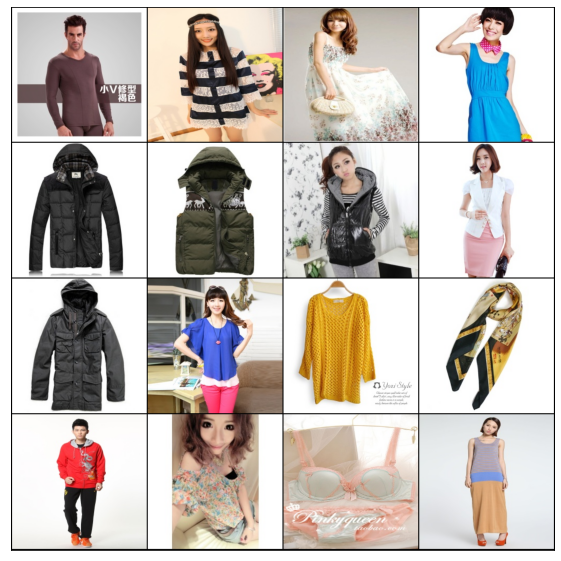

In [7]:
show_batch_imgs(images, nrow=4)

In [8]:
data['file_names']

['images/0/00/1278541879,867148000.jpg',
 'images/0/00/1298176222,2755628000.jpg',
 'images/0/00/1761426484,4024076000.jpg',
 'images/0/00/1992782016,1485508000.jpg',
 'images/0/00/2281045900,1423836000.jpg',
 'images/0/00/2534502585,3213368000.jpg',
 'images/0/00/2857470478,2090801000.jpg',
 'images/0/00/4248513,2431081000.jpg',
 'images/0/00/4261891920,318999000.jpg',
 'images/0/00/536938650,3866787000.jpg',
 'images/0/00/539364352,2137385000.jpg',
 'images/0/01/1090646914,3270247001.jpg',
 'images/0/01/1404249564,393925001.jpg',
 'images/0/01/1639309250,2738970001.jpg',
 'images/0/01/2073081611,1175667001.jpg',
 'images/0/01/2448263153,3995696001.jpg']

In [9]:
test_image_path = 'images/0/00/1761426484,4024076000.jpg'

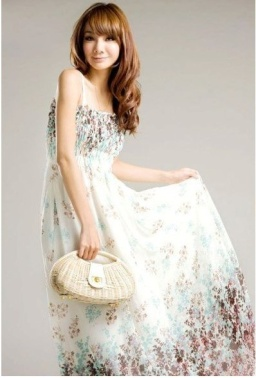

In [10]:
Image(os.path.join(dataset.root_dir, test_image_path))

In [11]:
dataset.filename_to_class[test_image_path]

12

In [12]:
labels

tensor([13, 11, 12, 11,  6,  8,  5,  9,  8,  3,  2, 10,  5,  3, 13, 11])

In [13]:
[dataset.ind_to_classname[x] for x in labels.tolist()]

['Underwear',
 'Dress',
 'Vest',
 'Dress',
 'Windbreaker',
 'Downcoat',
 'Hoodie',
 'Suit',
 'Downcoat',
 'Chiffon',
 'Knitwear',
 'Shawl',
 'Hoodie',
 'Chiffon',
 'Underwear',
 'Dress']

In [14]:
dataset.ind_to_classname

{0: 'T-Shirt',
 1: 'Shirt',
 2: 'Knitwear',
 3: 'Chiffon',
 4: 'Sweater',
 5: 'Hoodie',
 6: 'Windbreaker',
 7: 'Jacket',
 8: 'Downcoat',
 9: 'Suit',
 10: 'Shawl',
 11: 'Dress',
 12: 'Vest',
 13: 'Underwear'}

##  examples from each class

In [15]:
test_dataloader = dataset.test_dataloader(batch_size=300)
for data in test_dataloader:
    images = data['images']
    labels = data['labels']
    break
images.shape, labels.shape

(torch.Size([300, 3, 256, 256]), torch.Size([300]))

In [16]:
examples = defaultdict(list)
for img, label in zip(images, labels):
    label = label.item()
    examples[label].append(
        img.permute(1, 2, 0).numpy()
    )

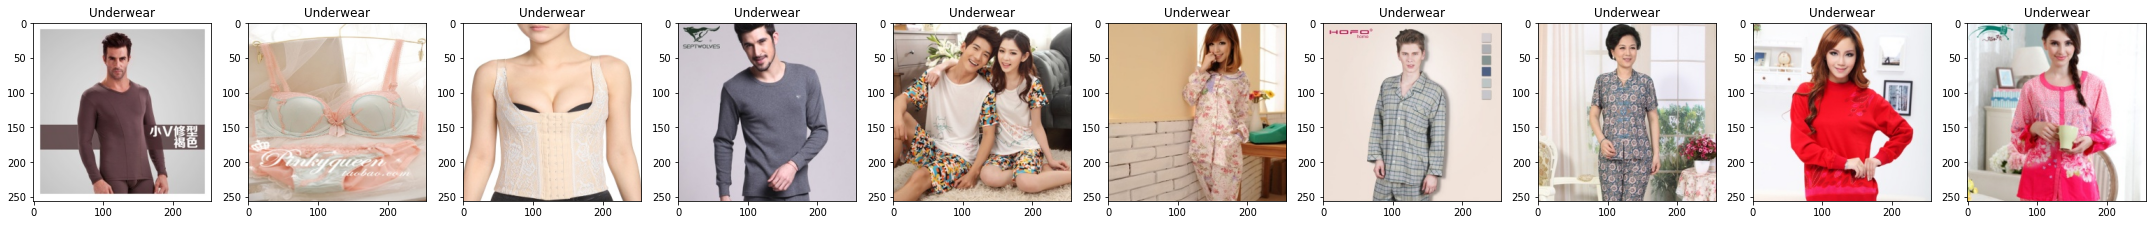

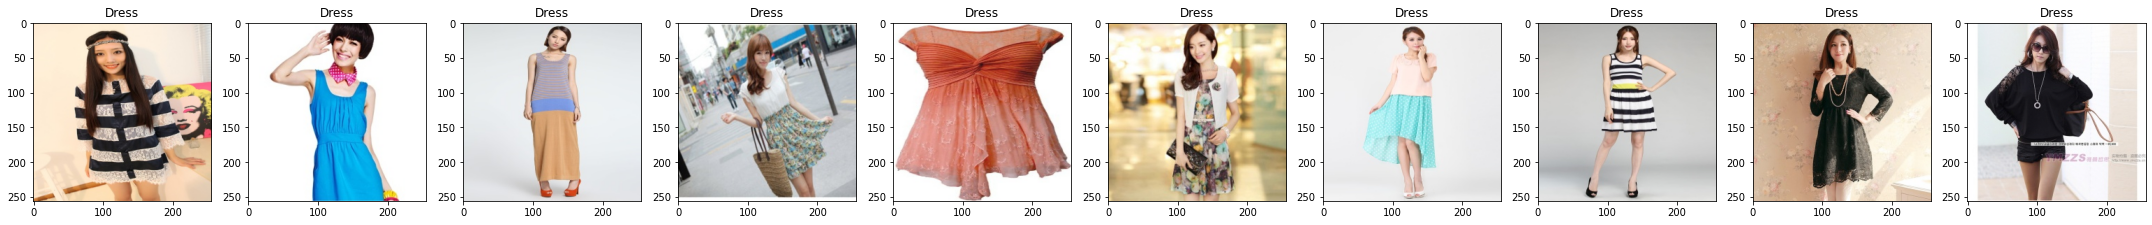

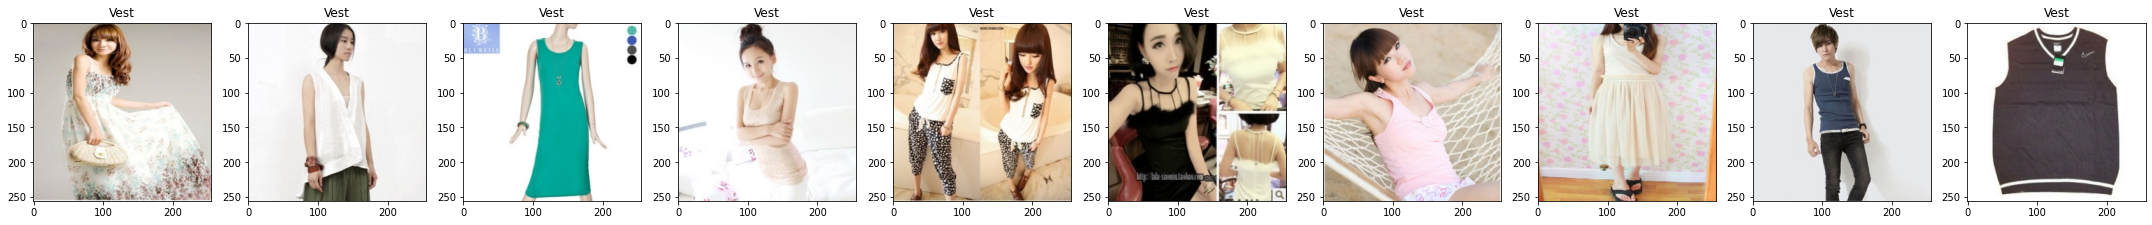

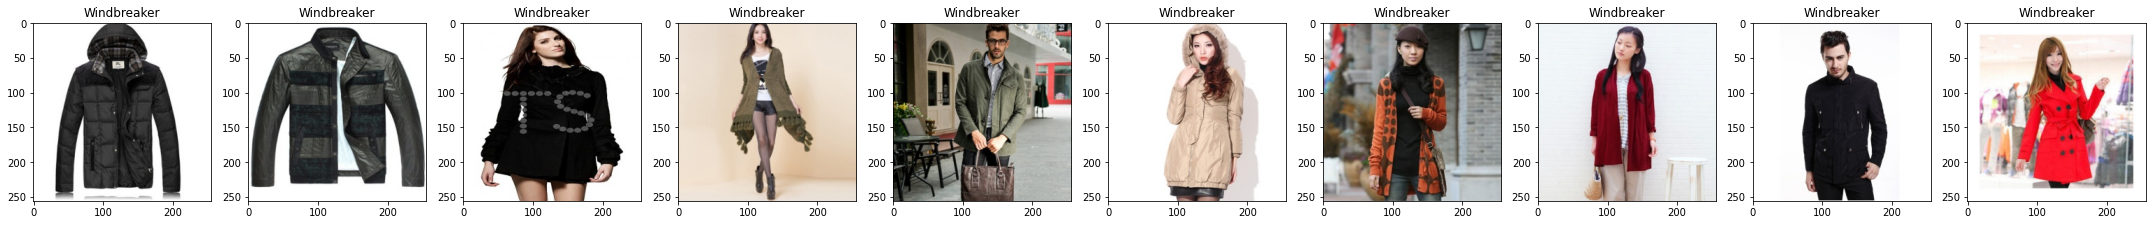

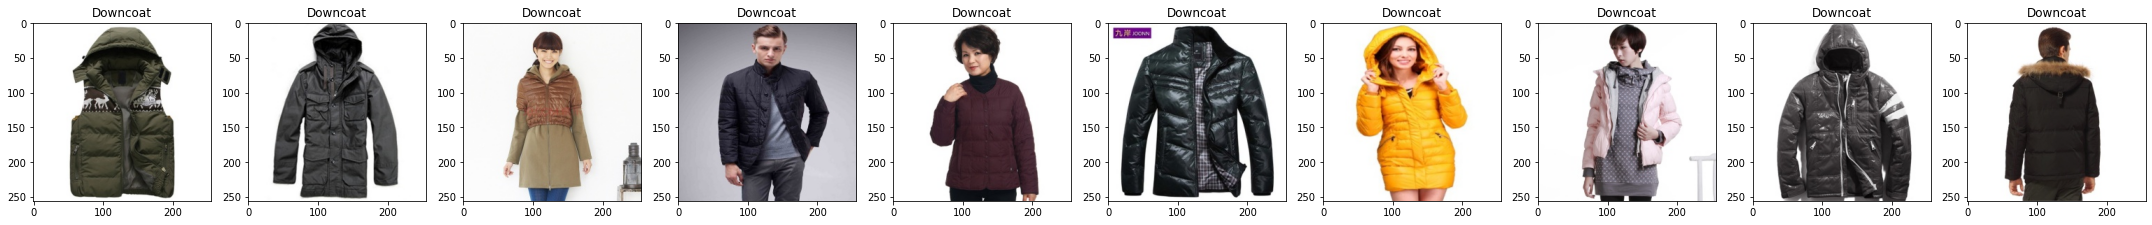

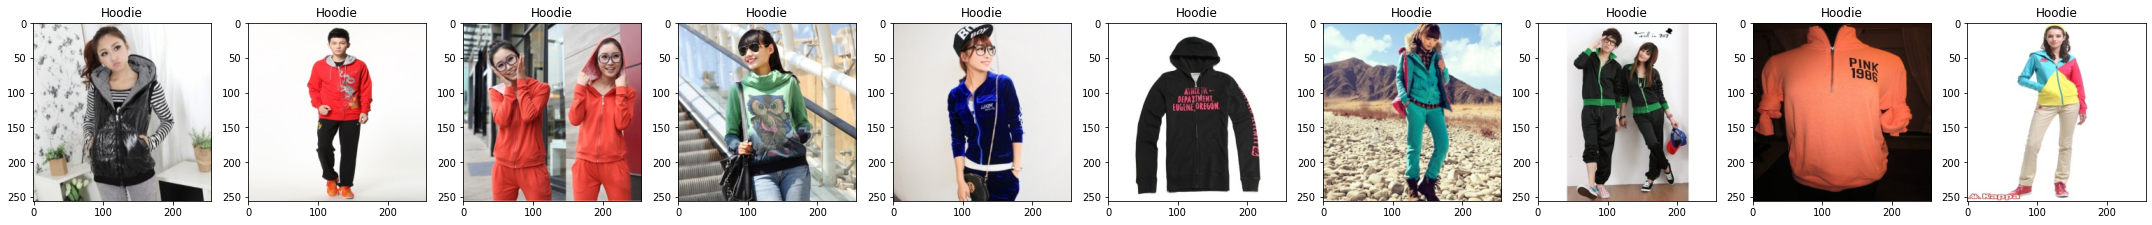

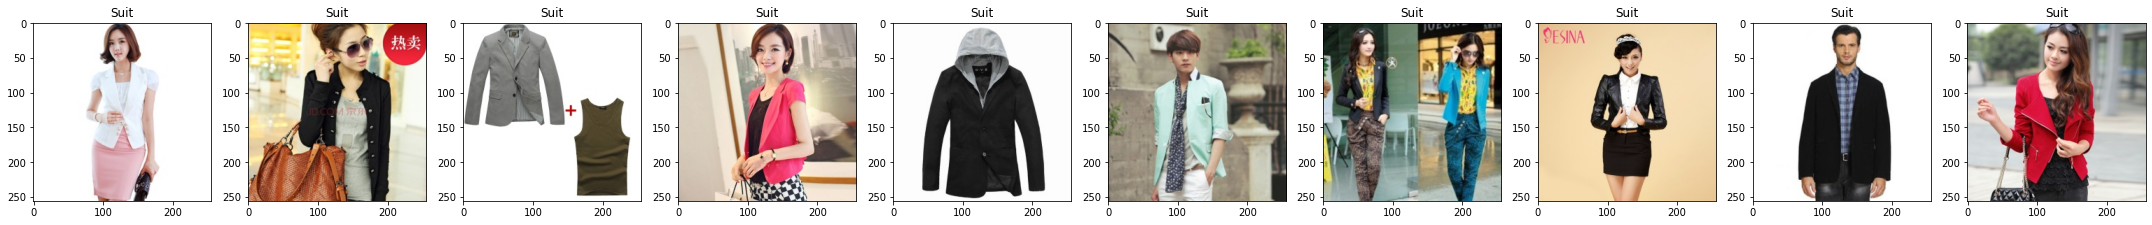

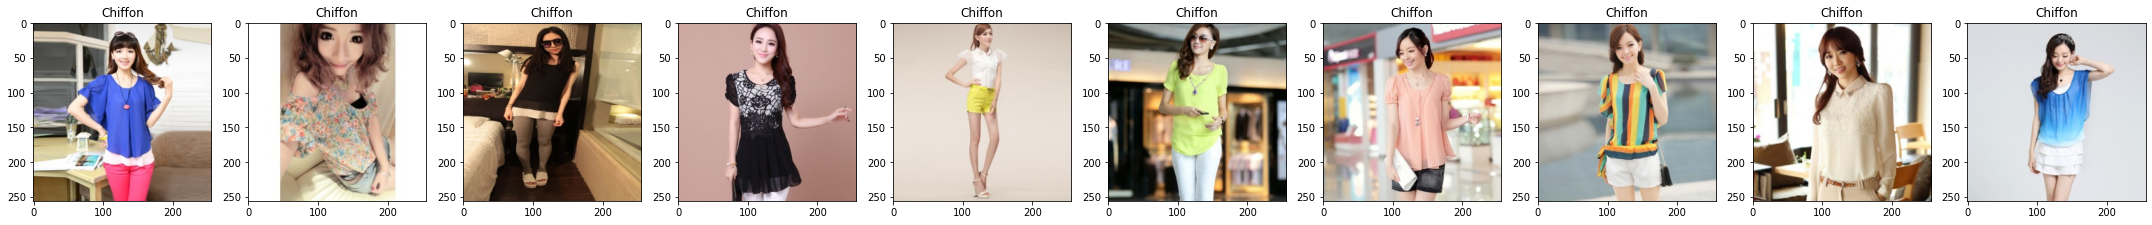

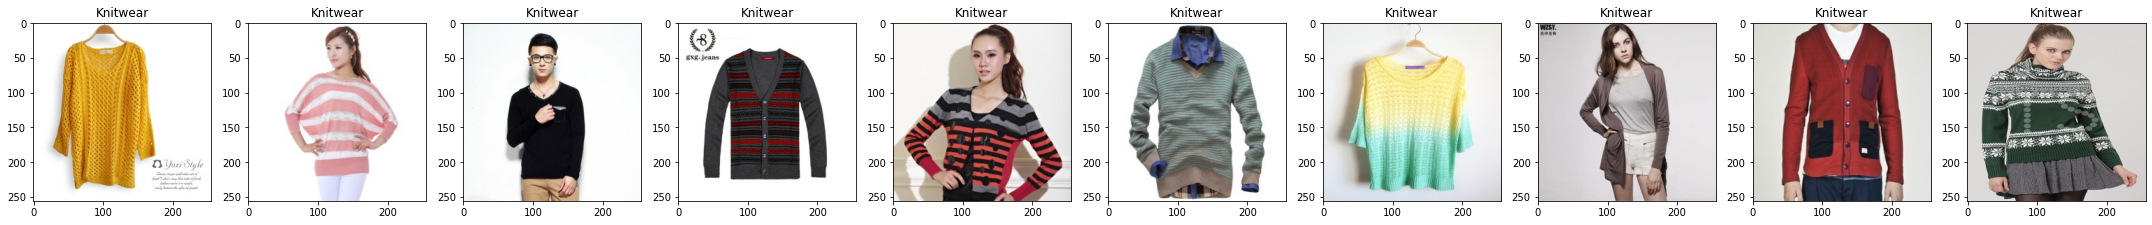

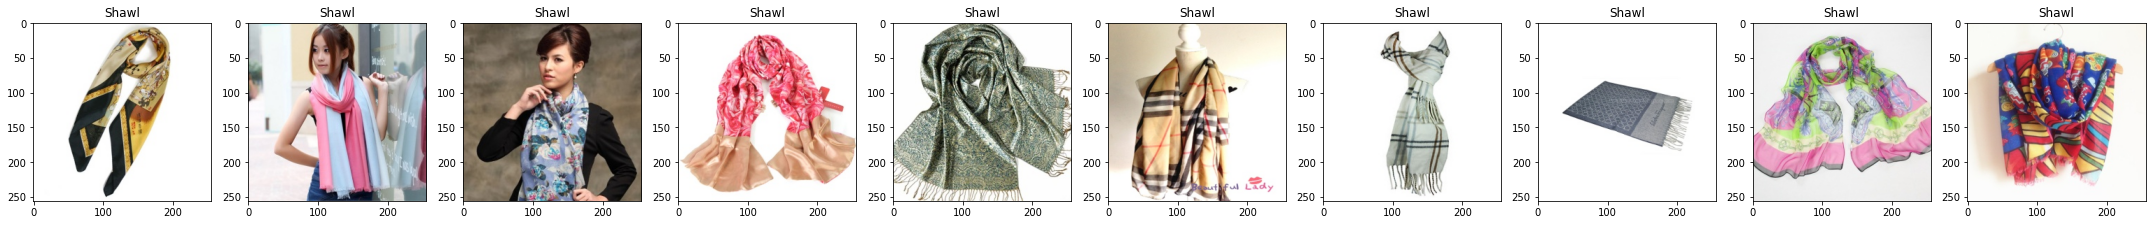

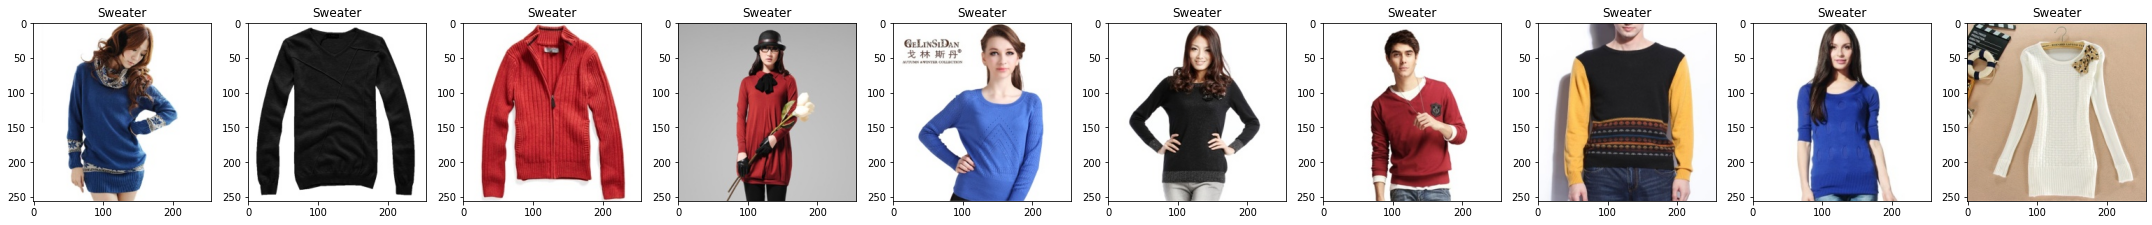

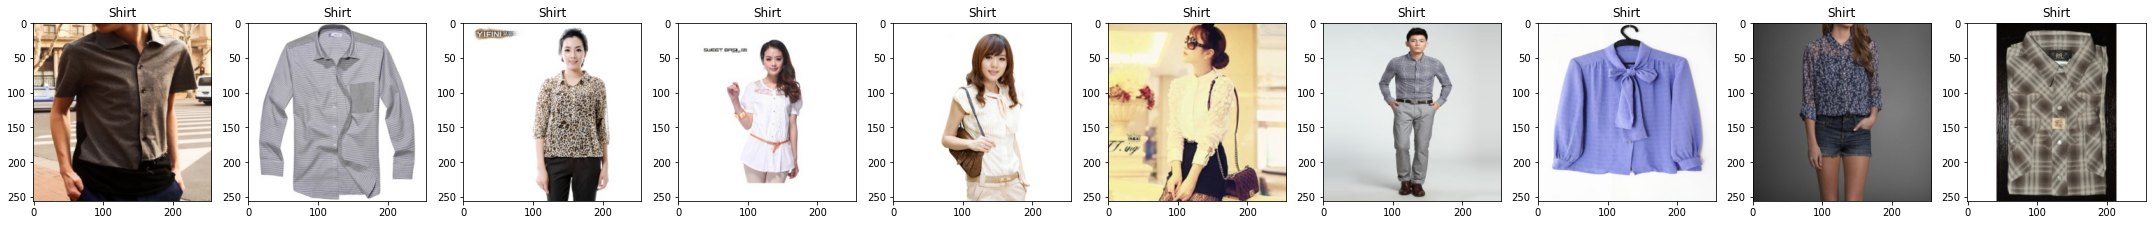

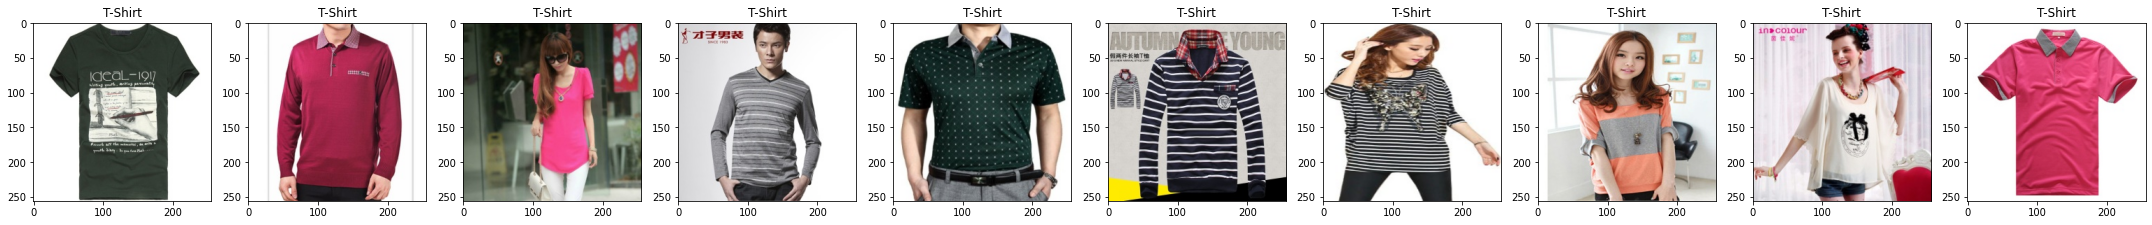

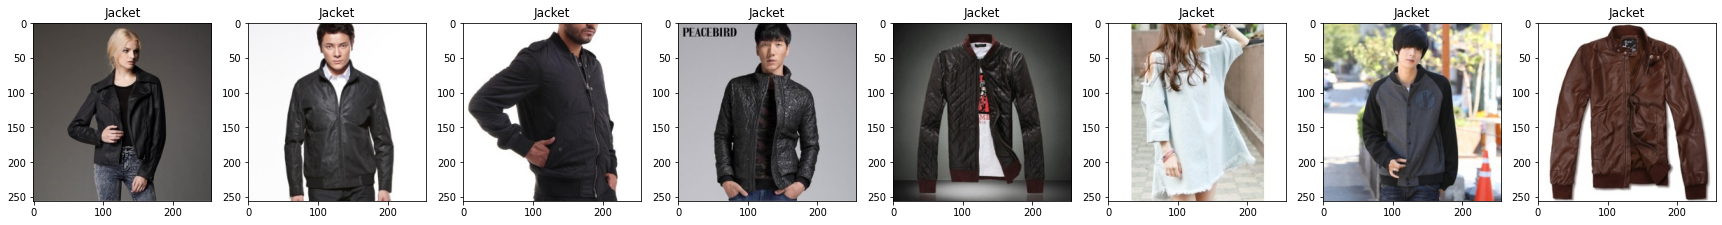

In [17]:
limit_sample = 10
for label, samples in examples.items():
    # print(label, dataset.ind_to_classname[label], len(samples))
    samples = samples[:limit_sample]
    
    plt.figure(figsize=(30, 10))
    for n, sample in enumerate(samples):
        plt.subplot(1, 10, n + 1)
        plt.title(dataset.ind_to_classname[label])
        plt.imshow(sample)
    plt.tight_layout()